# Семинар - Сверточные нейронные сети (Convolution neural network)

In [1]:
import random
import numpy as np
import pandas as pd

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10

/Library/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Загрузим данные

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('В трейне: ', x_train.shape[0], 'объектов, в тесте: ', x_test.shape[0])

В трейне:  50000 объектов, в тесте:  10000


In [5]:
num_classes = 10 #
class_names = ['plane', 'car', 
               'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

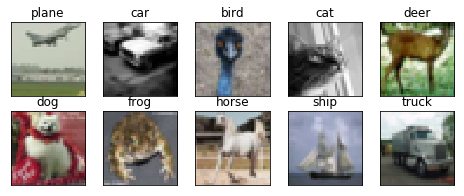

In [6]:
# Сгенерируем случаные примеры для каждого класса
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(0,1,2))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [7]:
x_train, x_val, y_train, y_val =  train_test_split(x_train, y_train, test_size=3000, train_size=47000)

In [8]:
print('Training data shape: ', x_train.shape)
print('Validation data shape: ', x_val.shape)
print('Test data shape: ', x_test.shape)

Training data shape:  (47000, 32, 32, 3)
Validation data shape:  (3000, 32, 32, 3)
Test data shape:  (10000, 32, 32, 3)


## Импорт библиотек и подготовка данных

In [10]:
from keras.models import Sequential # Модель, где все слои соединены друг с другом
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Flatten 
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.optimizers import Adam

In [11]:
np.random.seed(18)

x_train = x_train.astype('float32')
x_val= x_val.astype('float32')
x_test = x_test.astype('float32')

__Масштабируем данные__

In [13]:
# Ваш код здесь
x_train = x_train/255 
x_val = x_val/255
x_test = x_test/255

In [14]:
# Закодируем целевую переменную
y_train_ohe = np_utils.to_categorical(y_train, num_classes=num_classes)
y_val_ohe = np_utils.to_categorical(y_val, num_classes=num_classes)
y_test_ohe = np_utils.to_categorical(y_test, num_classes=num_classes)

## Создание CNN
__Baseline:__

- Convolutional input layer, 16 feature maps with a size of 5×5, a rectifier activation function and a weight constraint of max norm set to 3.
- Max Pool layer with size 2×2.
- Convolutional layer, 16 feature maps with a size of 5×5, a rectifier activation function and a weight constraint of max norm set to 3.
- Max Pool layer with size 2×2.
- Flatten layer.
- Fully connected layer with 512 units and a rectifier activation function.
- Dropout set to 50%.
- Fully connected layer with 128 units and a rectifier activation function.
- Dropout set to 50%.
- Fully connected output layer with 10 units and a softmax activation function.

In [20]:
lrate = 1e-5

In [21]:
x_train.shape

(47000, 32, 32, 3)

In [ ]:
# Создаем последовательную модель
model = Sequential()

model.add(Conv2D(16, (5,5), input_shape=(32, 32, 3), activation='relu',
                 kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5,5), activation='relu', 
                 kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


# Компилируем модель
adam = Adam(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

## Обучение CNN

In [28]:
epochs = 50
batch_size = 32

In [ ]:
# Обучаем модель! 
history = model.fit(x_train, y_train_ohe,
              epochs=epochs, batch_size=batch_size,
              validation_data=(x_val, y_val_ohe),
              shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 47000 samples, validate on 3000 samples
Epoch 1/50
47000/47000 [==============================] - 65s 1ms/step - loss: 2.2974 - acc: 0.1144 - val_loss: 2.2771 - val_acc: 0.1800
Epoch 2/50
47000/47000 [==============================] - 58s 1ms/step - loss: 2.2190 - acc: 0.1772 - val_loss: 2.0880 - val_acc: 0.2950
Epoch 3/50
47000/47000 [==============================] - 59s 1ms/step - loss: 2.0640 - acc: 0.2248 - val_loss: 1.9464 - val_acc: 0.3227
Epoch 4/50
47000/47000 [==============================] - 59s 1ms/step - loss: 1.9715 - acc: 0.2581 - val_loss: 1.8654 - val_acc: 0.3410
Epoch 5/50
47000/47000 [==============================] - 60s 1ms/step - loss: 1.9077 - acc: 0.2843 - val_loss: 1.8127 - val_acc: 0.3500
Epoch 6/50
47000/47000 [==============================] - 327s 7ms/step - loss: 1.8645 - acc: 0.3017 - val_loss: 1.7726 - val_acc: 0.3693
Epoch 7/50
47000/47000 [==============================] - 63s 1ms/step - loss: 1

In [ ]:
plt.plot(history.history['val_acc'], label='Test')
plt.plot(history.history['acc'], label='Train')
plt.xlabel('Epoch number')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
accuracy_score(y_test, model.predict_classes(x_test))

## Сохранение и загрузка моделей

#### Сохранение модели

In [ ]:
with open('cnn.json', 'w') as model_file:
            model_file.write(model.to_json())

#### Сохранение весов

In [ ]:
model.save_weights('cnn.h5')

#### Загрузка модели

In [ ]:
from keras.models import model_from_json

json_file = open("cnn.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель на основе загруженных данных
loaded_model = model_from_json(loaded_model_json)

In [ ]:
# Проверим
loaded_model.summary()

#### Загрузим обученные веса

In [ ]:
loaded_model.load_weights("cnn.h5")

## Предсказания

In [ ]:
predict = loaded_model.predict(x_test)
predicted_class = model.predict_classes(x_test)
print('Accuracy score: ', accuracy_score(y_test, predicted_class ))

In [ ]:
# Проверим случаный семпл:
num_pred = np.random.randint(0,999)

print('True class: ' + class_names[np.where(y_test_ohe[num_pred]==1)[0][0]])
print('Predicted class: ' + class_names[predicted_class[num_pred]])


fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(15, 5)
)

ax1.imshow(x_test[num_pred])
pd.Series(predict[num_pred], index=class_names).plot(kind='barh', ax=ax2, figsize=(12,4))
plt.show()

## Как "видит" мир нейронная сеть

In [ ]:
from keras import Model

In [ ]:
# Функция для отрисовки фильтров
def plot_conv_weights(model, layer_name):
    W = model.get_layer(name=layer_name).get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3]))
        
        fig, axs = plt.subplots(2,8, figsize=(16,4))

        fig.subplots_adjust(hspace = .2, wspace=0.5)
        axs = axs.ravel()
        for i in range(16):
            axs[i].imshow(W[:,:,i], cmap='binary')
            axs[i].set_title(str(i+1))

In [ ]:
plot_conv_weights(loaded_model, 'conv2d_13')
plot_conv_weights(loaded_model, 'conv2d_14')

In [ ]:
#Выберем слой, для визуализации:

layer = 0

activation_model = Model(inputs=loaded_model.input, 
                         outputs=loaded_model.layers[layer].output)
activation_model.summary()

test_img = np.expand_dims(x_test[num_pred], axis=0)
activation = activation_model.predict(test_img)

print(activation.shape)


In [ ]:
plt.title(class_names[np.where(y_test_ohe[num_pred]==1)[0][0]])
plt.imshow(x_test[num_pred])

fig, axs = plt.subplots(2,8, figsize=(16,4))
fig.subplots_adjust(hspace = .2, wspace=0.5)
axs = axs.ravel()
for i in range(16):
    axs[i].imshow(activation[0, :, :, i], cmap='binary')
    axs[i].set_title(str(i+1))